In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('Numerical_data.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Num Traveler type,Num User country,Num Hotel name,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Num Review month,Num User continent
0,0,0,11,4,13,5,3.0,3773,9,1,1,1,0,1,0,0,1,1,1,1
1,1,1,119,21,75,3,3.0,3773,3,2,1,1,0,1,0,0,1,1,1,1
2,2,2,36,9,25,5,3.0,3773,2,3,1,1,0,1,0,0,1,1,2,1
3,3,3,14,7,14,4,3.0,3773,6,1,2,1,0,1,0,0,1,1,2,2
4,4,4,5,5,2,4,3.0,3773,7,5,3,1,0,1,0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,499,15,4,8,5,4.0,826,1,4,2,21,1,1,0,1,1,1,10,2
500,500,500,50,13,29,4,4.0,826,8,4,3,21,1,1,0,1,1,1,11,1
501,501,501,154,23,31,4,4.0,826,4,1,1,21,1,1,0,1,1,1,11,1
502,502,502,9,6,5,2,4.0,826,9,3,1,21,1,1,0,1,1,1,12,1


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df = df.drop(columns=['Unnamed: 0.1'])

In [ ]:
df

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Num Traveler type,Num User country,Num Hotel name,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Num Review month,Num User continent
0,11,4,13,5,3.0,3773,9,1,1,1,0,1,0,0,1,1,1,1
1,119,21,75,3,3.0,3773,3,2,1,1,0,1,0,0,1,1,1,1
2,36,9,25,5,3.0,3773,2,3,1,1,0,1,0,0,1,1,2,1
3,14,7,14,4,3.0,3773,6,1,2,1,0,1,0,0,1,1,2,2
4,5,5,2,4,3.0,3773,7,5,3,1,0,1,0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,15,4,8,5,4.0,826,1,4,2,21,1,1,0,1,1,1,10,2
500,50,13,29,4,4.0,826,8,4,3,21,1,1,0,1,1,1,11,1
501,154,23,31,4,4.0,826,4,1,1,21,1,1,0,1,1,1,11,1
502,9,6,5,2,4.0,826,9,3,1,21,1,1,0,1,1,1,12,1


In [ ]:
df.corr()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Num Traveler type,Num User country,Num Hotel name,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Num Review month,Num User continent
Nr. reviews,1.000000,0.655080,0.790696,-0.024320,-4.824147e-02,-1.365803e-01,0.118700,-0.029683,0.020474,4.700587e-02,5.647509e-02,-6.986994e-02,-2.945445e-02,-9.757454e-02,-4.111311e-02,-7.074043e-02,-9.375394e-02,-0.057884
Nr. hotel reviews,0.655080,1.000000,0.764322,0.013718,-9.136332e-02,-1.288962e-01,0.293122,-0.039688,0.053979,4.449372e-02,7.690941e-02,-4.610116e-02,-2.060371e-02,-9.656774e-02,-6.491372e-02,-1.340215e-02,-1.971591e-02,0.005753
Helpful votes,0.790696,0.764322,1.000000,0.015472,-1.900017e-02,-9.914754e-02,0.270077,-0.014960,0.021248,4.168801e-02,6.113211e-02,-6.188265e-02,7.322307e-05,-7.407429e-02,-2.132168e-02,-3.458875e-02,-9.006414e-02,-0.037005
Score,-0.024320,0.013718,0.015472,1.000000,1.914899e-01,-8.020005e-02,0.070153,0.016681,-0.043161,1.761580e-01,2.032482e-01,8.817711e-03,6.591239e-02,4.982007e-02,-1.407349e-02,1.847311e-01,-9.138680e-03,-0.047780
Hotel stars,-0.048241,-0.091363,-0.019000,0.191490,1.000000e+00,3.189122e-01,0.036080,0.037942,0.011838,5.590170e-02,3.302891e-01,-1.032154e-01,-1.754661e-01,4.644691e-01,3.744014e-01,4.128614e-02,3.298980e-19,0.014332
Nr. rooms,-0.136580,-0.128896,-0.099148,-0.080200,3.189122e-01,1.000000e+00,-0.018983,0.055662,-0.045094,-3.729440e-01,-2.745230e-01,3.497020e-01,-2.113750e-01,4.515754e-01,4.156920e-01,-1.404496e-01,2.442365e-18,0.087741
Member years,0.118700,0.293122,0.270077,0.070153,3.607986e-02,-1.898304e-02,1.000000,0.031124,0.035174,3.534688e-02,3.952986e-02,5.861324e-02,7.724225e-03,5.588704e-02,1.120748e-02,5.861324e-02,-2.207369e-02,-0.036766
Num Traveler type,-0.029683,-0.039688,-0.014960,0.016681,3.794180e-02,5.566226e-02,0.031124,1.000000,-0.030605,4.248920e-02,5.603635e-02,2.465599e-02,-2.241454e-02,9.302034e-02,4.715753e-02,-6.163998e-02,1.887473e-02,0.012025
Num User country,0.020474,0.053979,0.021248,-0.043161,1.183789e-02,-4.509410e-02,0.035174,-0.030605,1.000000,1.211464e-02,8.478705e-02,2.845291e-02,-2.403326e-02,-3.368614e-02,4.434661e-03,-3.434579e-02,5.936463e-02,0.413273
Num Hotel name,0.047006,0.044494,0.041688,0.176158,5.590170e-02,-3.729440e-01,0.035347,0.042489,0.012115,1.000000e+00,3.692745e-01,-2.049885e-18,-9.231862e-02,-7.385489e-02,-2.946898e-01,2.954196e-01,0.000000e+00,-0.111003


<function matplotlib.pyplot.show>

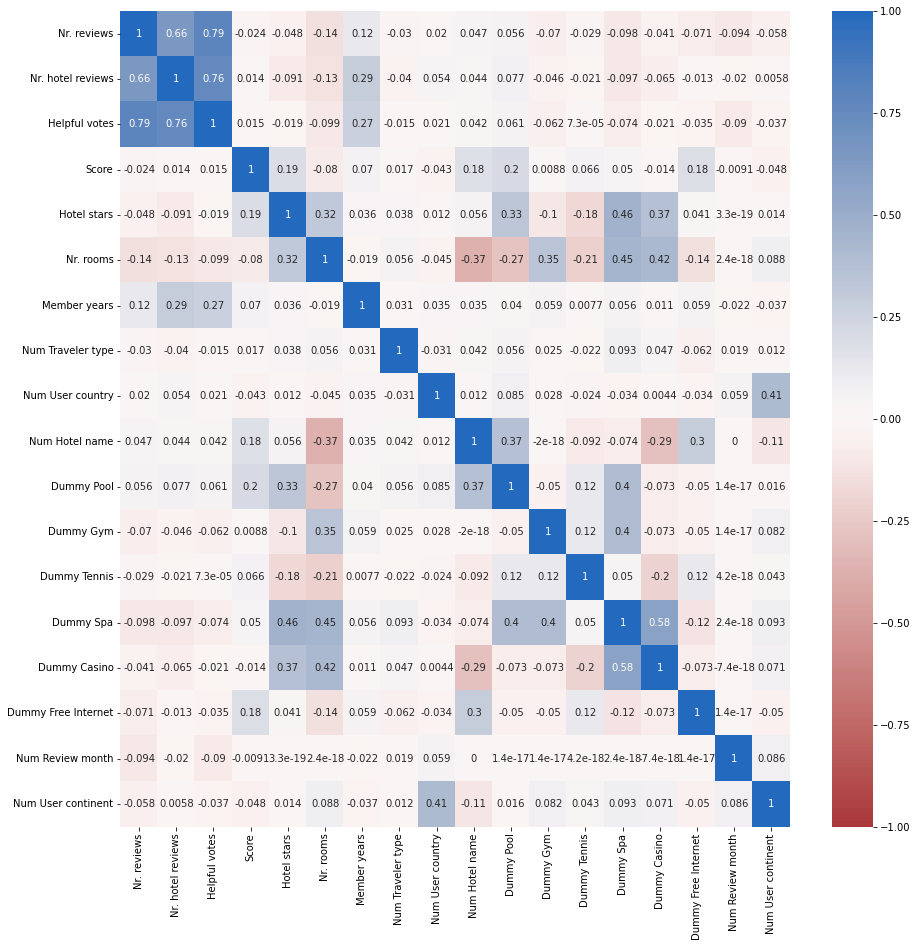

In [ ]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag_r')
plt.savefig("Heatmap.png")
plt.show

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['Hotel stars', 'Num Hotel name', 'Dummy Pool', 'Dummy Free Internet']], df['Score'],train_size=0.8)

# Initialize our decision tree object
classification_tree = DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(xtrain, ytrain)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns = ['Score']), df['Score'],train_size=0.8)

# Initialize our decision tree object
classification_tree = DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(xtrain, ytrain)

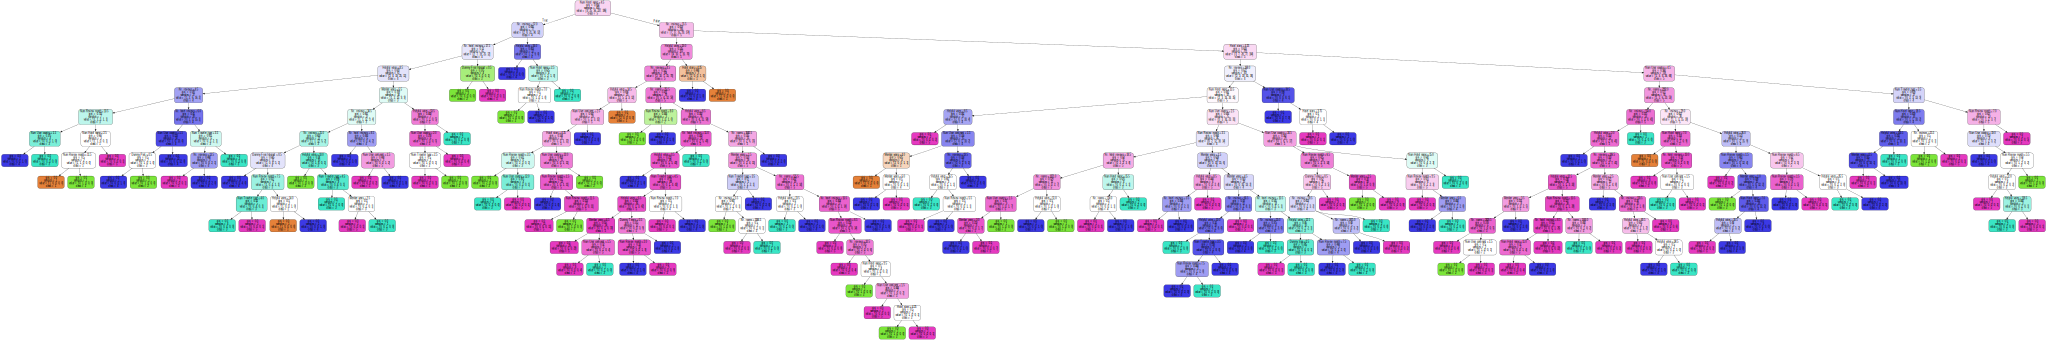

In [ ]:
dot_data = export_graphviz(classification_tree, out_file=None,  
                           feature_names = df.drop(columns = ['Score']).columns,  
                           class_names = ['1','2','3','4','5'], 
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph
graph.render("All Data", view=True) 

In [ ]:
model = DecisionTreeClassifier()

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

print(f'Accuracy Score: {metrics.accuracy_score(ytest, y_pred)}')
print(f'Precision Score: {metrics.precision_score(ytest, y_pred, average="macro")}')
print(f'Recall Score: {metrics.recall_score(ytest, y_pred, average="macro")}')
print(f'F1 Score: {metrics.f1_score(ytest, y_pred, average="macro")}')

Accuracy Score: 0.37623762376237624
Precision Score: 0.21035048165607706
Recall Score: 0.22649350649350647
F1 Score: 0.21420929241261719


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Run this cell if working in Google CoLab
!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y

!pip install -U scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
Found existing installation: imbalanced-learn 0.8.1
Uninstalling imbalanced-learn-0.8.1:
  Successfully uninstalled imbalanced-learn-0.8.1
  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingRegressor, AdaBoostClassifier
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

In [ ]:
model = DecisionTreeClassifier()

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

print(f'Accuracy Score: {metrics.accuracy_score(ytest, y_pred)}')
print(f'Precision Score: {metrics.precision_score(ytest, y_pred, average="macro")}')
print(f'Recall Score: {metrics.recall_score(ytest, y_pred, average="macro")}')
print(f'F1 Score: {metrics.f1_score(ytest, y_pred, average="macro")}')

Accuracy Score: 0.3069306930693069
Precision Score: 0.18311858076563958
Recall Score: 0.18146162780309122
F1 Score: 0.18140894872841018


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def model_validation(ytrue, y_pred):
    '''Definition for computing and printing a series of Classification metric scores'''
    print(f'Accuracy Score: {metrics.accuracy_score(ytrue, y_pred)}')
    print(f'Precision Score: {metrics.precision_score(ytrue, y_pred, average="macro")}')
    print(f'Recall Score: {metrics.recall_score(ytrue, y_pred, average="macro")}')
    print(f'F1 Score: {metrics.f1_score(ytrue, y_pred, average="macro")}')

In [ ]:
features = df[['Hotel stars', 'Num Hotel name', 'Dummy Pool', 'Dummy Free Internet']]
target = df['Score']

xtrain, xtest, ytrain, ytrue = train_test_split(features, target, random_state=2)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(xtrain, ytrain)

model = DecisionTreeClassifier(random_state=4)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(xtest)

model_validation(ytrue, y_pred)

Accuracy Score: 0.23809523809523808
Precision Score: 0.27040540540540536
Recall Score: 0.31163298652794447
F1 Score: 0.22522409236333285


In [ ]:
# Set parameter for max number of features for Random Forest
features = df.drop(columns=['Score'])


m = np.int64(np.sqrt(features.shape[1]))
print(m)

# Set up our Random Forest
random_forest = RandomForestClassifier(max_features=m, max_samples=0.75, oob_score=True, random_state=4)
random_forest.fit(xtrain, ytrain)

y_pred = random_forest.predict(xtest)

model_validation(ytest, y_pred)

random_forest.feature_names_in_

4
Accuracy Score: 0.40594059405940597
Precision Score: 0.20729166666666665
Recall Score: 0.2134228740936058
F1 Score: 0.19333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array(['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Hotel stars',
       'Nr. rooms', 'Member years', 'Num Traveler type',
       'Num User country', 'Num Hotel name', 'Dummy Pool', 'Dummy Gym',
       'Dummy Tennis', 'Dummy Spa', 'Dummy Casino', 'Dummy Free Internet',
       'Num Review month', 'Num User continent'], dtype=object)

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_features=m, max_samples=.75, random_state=4),
                              learning_rate=.1, n_estimators=25, random_state=1)

adaboost.fit(xtrain, ytrain)

y_pred = adaboost.predict(xtest)

model_validation(ytest, y_pred)

Accuracy Score: 0.37623762376237624
Precision Score: 0.23405797101449277
Recall Score: 0.2043012524719842
F1 Score: 0.18853146853146857


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ros = RandomOverSampler()

X_resampled, y_resampled = ros.fit_resample(xtrain, ytrain)

value_counts = np.unique(y_resampled, return_counts=True)
for val, count in zip(value_counts[0], value_counts[1]):
    print(val, count)

1 183
2 183
3 183
4 183
5 183


In [ ]:
model = DecisionTreeClassifier()

model.fit(X_resampled, y_resampled)

y_pred = model.predict(xtest)

print(f'Accuracy Score: {metrics.accuracy_score(ytest, y_pred)}')
print(f'Precision Score: {metrics.precision_score(ytest, y_pred, average="macro")}')
print(f'Recall Score: {metrics.recall_score(ytest, y_pred, average="macro")}')
print(f'F1 Score: {metrics.f1_score(ytest, y_pred, average="macro")}')

Accuracy Score: 0.3564356435643564
Precision Score: 0.20095389507154215
Recall Score: 0.1983116883116883
F1 Score: 0.1982363315696649


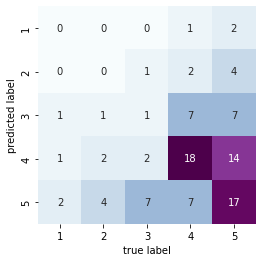

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix function makes easy work of obtaining matrix
mat = confusion_matrix(ytest, y_pred)

# Use seaborn to make a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(xtrain, ytrain);

In [ ]:
y_pred = regressor.predict(xtest)

In [ ]:
df_test = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df_test

,Actual,Predicted
146,4,3.977583
103,4,4.069229
152,5,4.086126
264,1,4.225612
10,2,3.407961
...,...,...
289,2,4.148070
354,3,4.183962
277,5,4.383037
453,5,4.340158


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 0.799842893107059
Mean Squared Error: 1.0095043003424278
Root Mean Squared Error: 1.004740912047692
